<b><h2> CROP YIELD PREDICTION IN INDIA </h2></b>

Predicting yield helps the state to get an estimate of the crop in a
certain year to control the price rates.This model focuses on predicting the crop yield in advance by analyzing
factors like location, season, and crop type  through machine learning techniques on
previously collected datasets.

In [71]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# loading the dataset

crop_data=pd.read_csv("crop_production.csv")
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [73]:
crop_data.shape

#rows X columns

(246091, 7)

In [74]:
# dataset columns
crop_data.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [75]:
# statistical inference of the dataset

crop_data.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [76]:
# Checking missing values of the dataset in each column
crop_data.isnull().sum()

,0
State_Name,0
District_Name,0
Crop_Year,0
Season,0
Crop,0
Area,0
Production,3730


In [77]:
# Dropping missing values
crop_data = crop_data.dropna()
crop_data

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [78]:
#checking
crop_data.isnull().values.any()


np.False_

In [79]:
# Displaying State Names present in the dataset
crop_data.State_Name.unique()

array(['Andaman and Nicobar Islands', 'Andhra Pradesh',
       'Arunachal Pradesh', 'Assam', 'Bihar', 'Chandigarh',
       'Chhattisgarh', 'Dadra and Nagar Haveli', 'Goa', 'Gujarat',
       'Haryana', 'Himachal Pradesh', 'Jammu and Kashmir ', 'Jharkhand',
       'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry',
       'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana ',
       'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal'],
      dtype=object)

In [80]:
# Filtering only Kerala data
kerala_data = crop_data[crop_data['State_Name'] == 'Kerala']
print("Kerala dataset shape:", kerala_data.shape)
kerala_data.head()


Kerala dataset shape: (4003, 7)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
97987,Kerala,ALAPPUZHA,1997,Whole Year,Arecanut,2253.0,1518.0
97988,Kerala,ALAPPUZHA,1997,Whole Year,Black pepper,2235.0,248.0
97989,Kerala,ALAPPUZHA,1997,Whole Year,Cashewnut,7205.0,2358.0
97990,Kerala,ALAPPUZHA,1997,Whole Year,Coconut,77893.0,399000.0
97991,Kerala,ALAPPUZHA,1997,Whole Year,Tapioca,3911.0,74110.0


In [81]:
# Adding a new column Yield which indicates Production per unit Area.

kerala_data['Yield'] = (kerala_data['Production'] / kerala_data['Area'])
kerala_data.head(10)

/tmp/ipython-input-2456002815.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kerala_data['Yield'] = (kerala_data['Production'] / kerala_data['Area'])


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Yield
97987,Kerala,ALAPPUZHA,1997,Whole Year,Arecanut,2253.0,1518.0,0.673768
97988,Kerala,ALAPPUZHA,1997,Whole Year,Black pepper,2235.0,248.0,0.110962
97989,Kerala,ALAPPUZHA,1997,Whole Year,Cashewnut,7205.0,2358.0,0.327273
97990,Kerala,ALAPPUZHA,1997,Whole Year,Coconut,77893.0,399000.0,5.122412
97991,Kerala,ALAPPUZHA,1997,Whole Year,Tapioca,3911.0,74110.0,18.949118
97992,Kerala,ALAPPUZHA,1998,Autumn,Rice,8719.0,17570.0,2.015139
97993,Kerala,ALAPPUZHA,1998,Kharif,Sesamum,1150.0,140.0,0.121739
97994,Kerala,ALAPPUZHA,1998,Summer,Rice,19058.0,58013.0,3.044024
97995,Kerala,ALAPPUZHA,1998,Whole Year,Arecanut,2067.0,766.0,0.370585
97996,Kerala,ALAPPUZHA,1998,Whole Year,Banana,324.0,4493.0,13.867284


/tmp/ipython-input-2973845207.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_yield, x="District_Name", y="Yield", palette="viridis")


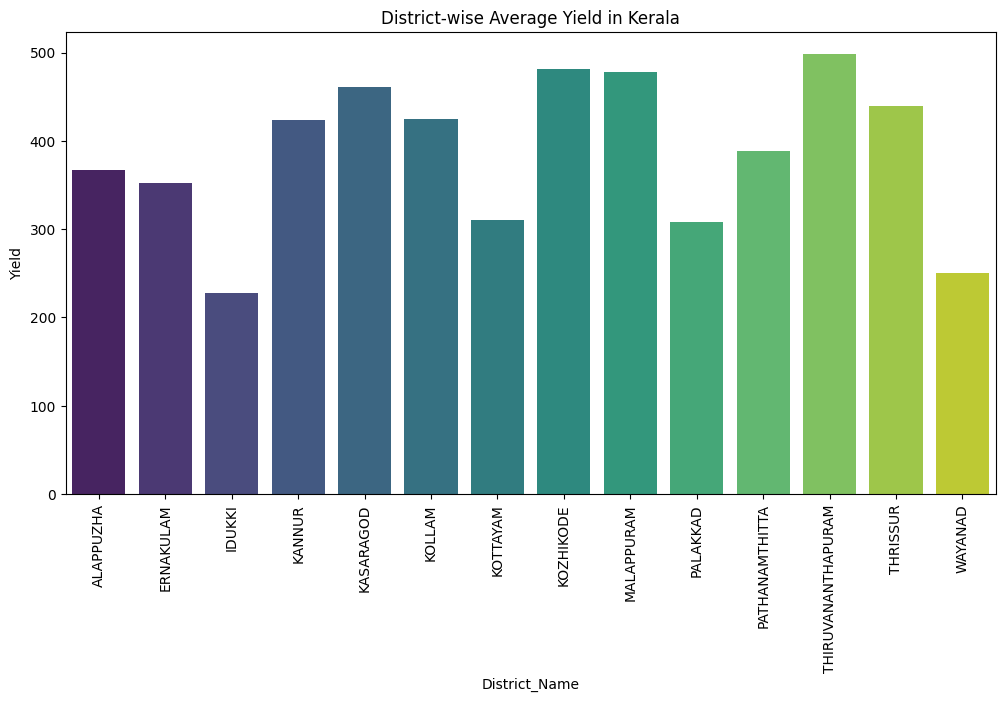

In [82]:
# District-wise average yield in Kerala
district_yield = kerala_data.groupby("District_Name")["Yield"].mean().reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=district_yield, x="District_Name", y="Yield", palette="viridis")
plt.xticks(rotation=90)
plt.title("District-wise Average Yield in Kerala")
plt.show()


**Pairplot and Correlation**
Pairplot: many mini-scatterplots that show how each pair of numbers relate.


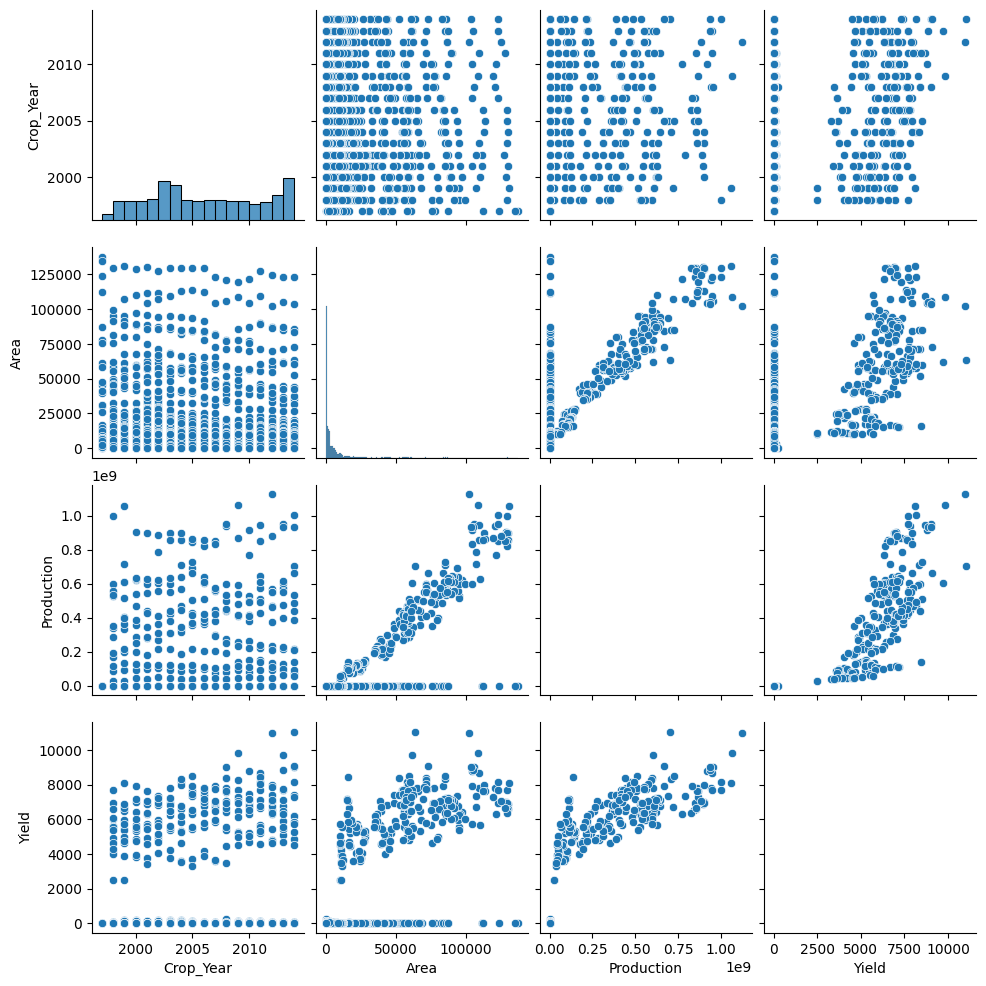

In [83]:
data = kerala_data.drop(['State_Name'], axis=1)
ax = sns.pairplot(kerala_data)
ax

In [84]:
# Select only numeric columns for correlation calculation
numeric_data = data.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numeric_data.corr()

# Display the correlation matrix
display(correlation_matrix)

,Crop_Year,Area,Production,Yield
Crop_Year,1.000000,-0.057203,0.022179,0.039401
Area,-0.057203,1.000000,0.835687,0.762559
Production,0.022179,0.835687,1.000000,0.904577
Yield,0.039401,0.762559,0.904577,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

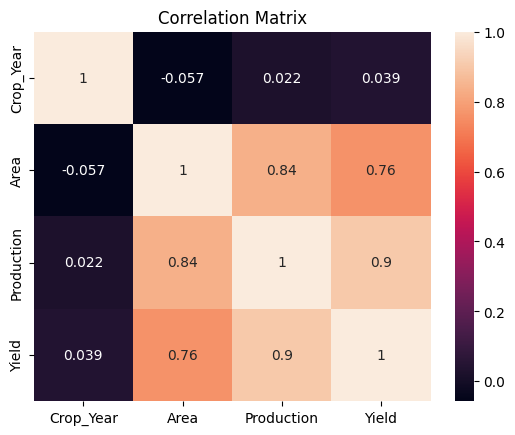

In [85]:
sns.heatmap(numeric_data.corr(), annot =True)
plt.title('Correlation Matrix')

In [86]:
dummy = pd.get_dummies(data)
dummy


,Crop_Year,Area,Production,Yield,District_Name_ALAPPUZHA,District_Name_ERNAKULAM,District_Name_IDUKKI,District_Name_KANNUR,District_Name_KASARAGOD,District_Name_KOLLAM,...,Crop_Snak Guard,Crop_Soyabean,Crop_Sugarcane,Crop_Sweet potato,Crop_Tapioca,Crop_Tea,Crop_Tobacco,Crop_Turmeric,Crop_Wheat,Crop_other oilseeds
97987,1997,2253.0,1518.00,0.673768,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97988,1997,2235.0,248.00,0.110962,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97989,1997,7205.0,2358.00,0.327273,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97990,1997,77893.0,399000.00,5.122412,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
97991,1997,3911.0,74110.00,18.949118,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102242,2014,1.0,0.45,0.450000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
102244,2014,8.0,127.00,15.875000,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
102245,2014,2327.0,99788.00,42.882682,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
102246,2014,161.0,481.00,2.987578,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


<b><i> Splitting dataset into train and test dataset </i></b>

In [87]:
from sklearn.model_selection import train_test_split

# Features and Target
x = dummy.drop(["Production","Yield"], axis=1)
y = dummy["Yield"]   # Target = Yield now


In [88]:
import pickle
with open("columns.pkl", "wb") as f:
    pickle.dump(x.columns.tolist(), f)


In [89]:



# Splitting data set - 25% test dataset and 75%

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25, random_state=5)

print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (3002, 64)
x_test : (1001, 64)
y_train : (3002,)
y_test : (1001,)


In [90]:
print(x_train)
print(y_train)

        Crop_Year     Area  District_Name_ALAPPUZHA  District_Name_ERNAKULAM  \
98206        2011   724.76                     True                    False   
99757        2011    54.59                    False                    False   
99545        1998  5180.00                    False                    False   
100393       2014    43.00                    False                    False   
99542        1998  1941.00                    False                    False   
...           ...      ...                      ...                      ...   
101386       1997  2839.00                    False                    False   
101234       2005   955.00                    False                    False   
99840        1998  1813.00                    False                    False   
100402       1997  7010.00                    False                    False   
101100       1997  4420.00                    False                    False   

        District_Name_IDUKKI  District_

<b><h3> Linear Regression </b></h3>

In [91]:
# Training the Simple Linear Regression model .

from sklearn.linear_model import LinearRegression
model1 = LinearRegression()
model1.fit(x_train,y_train)

LinearRegression()

In [92]:
# Predicting the test Results

lr_predict = model1.predict(x_test)
lr_predict

array([ 5.51796271e+03,  5.33400856e+01, -2.39573803e+01, ...,
        8.91076639e+01, -4.49943980e+00,  2.02162203e+00])

In [93]:
from sklearn.metrics import r2_score
r = r2_score(y_test,lr_predict)
print("R2 score : ",r)

R2 score :  0.8639462603307364


Text(0.5, 1.0, 'Linear Regression')

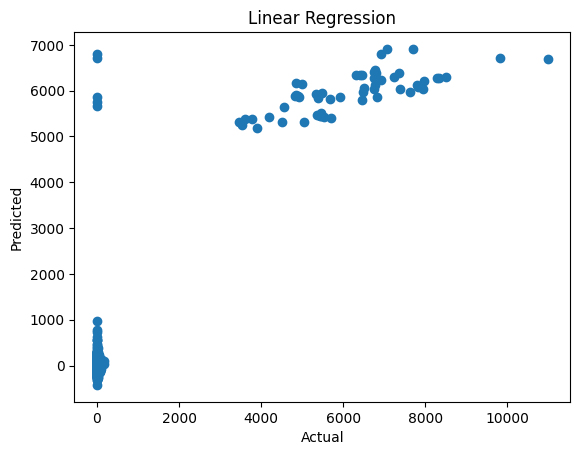

In [94]:
plt.scatter(y_test,lr_predict)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression')

Clearly, the dataset is not good for linear regression.

<b> Assumptions of Linear Regression </b>
<ol>
    <li> Linearity.</li>
    <li> Homoscedasticity </li>
    <li> Multivariate normality </li>
    <li> Lack of multicollinearity </li>
    


# R2 score: This is pronounced as R-squared, and this score refers to the coefficient of determination.
# This tells us how well the unknown sam **bold text**ples will be predicted by our model.

<b><h3> Random Forest Algorithm </h3></b>

In [95]:
from sklearn.ensemble import RandomForestRegressor
model2 = RandomForestRegressor(n_estimators = 11)
model2.fit(x_train,y_train)
rf_predict = model2.predict(x_test)
rf_predict

array([5.38026352e+03, 2.86164507e+00, 7.66650250e+00, ...,
       2.40925124e+00, 7.69443504e+00, 0.00000000e+00])

In [96]:
model2.score(x_test,y_test)

0.985845381710199

In [97]:
# Calculating R2 score

from sklearn.metrics import r2_score
r1 = r2_score(y_test,rf_predict)
print("R2 score : ",r1)

R2 score :  0.985845381710199


In [98]:
# Calculating Adj. R2 score:

Adjr2_1 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_1))

Adj. R-Squared : 0.8546434405242911


/tmp/ipython-input-551929062.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-551929062.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rf_predict, hist = False, color = "b", label = "Pre

Text(0.5, 1.0, 'Random Forest Regression')

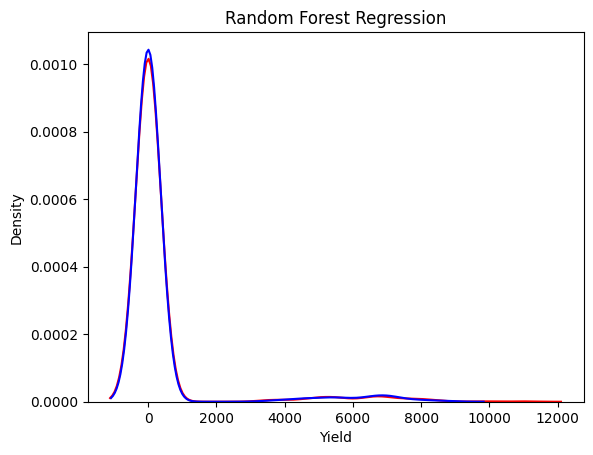

In [99]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(rf_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Random Forest Regression')

*District-level predicted yields*

In [100]:
district_pred = kerala_data.copy()

# Directly predict Yield
district_pred["Predicted_Yield"] = model2.predict(dummy.drop(["Production","Yield"], axis=1))


In [101]:
# Group by district for averages
district_pred_grouped = district_pred.groupby("District_Name")[["Yield","Predicted_Yield"]].mean().reset_index()

/tmp/ipython-input-1259637920.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=district_pred_grouped, x="District_Name", y="Predicted_Yield", palette="coolwarm")


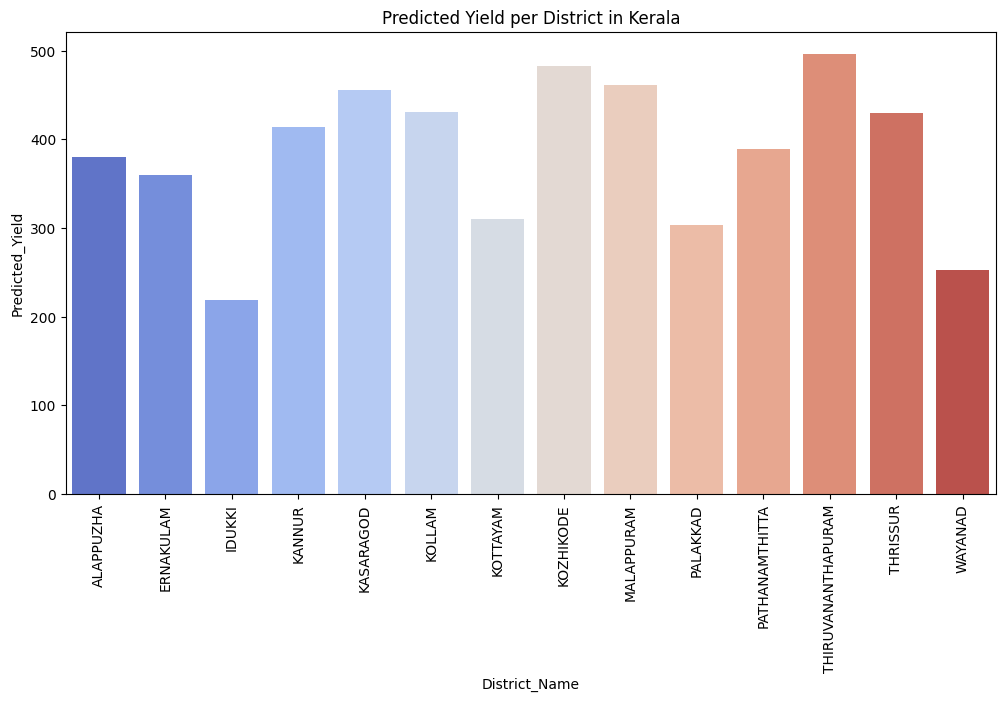

In [102]:
plt.figure(figsize=(12,6))
sns.barplot(data=district_pred_grouped, x="District_Name", y="Predicted_Yield", palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Predicted Yield per District in Kerala")
plt.show()

In [103]:
print(district_pred_grouped.head())

  District_Name       Yield  Predicted_Yield
0     ALAPPUZHA  367.237671       380.138720
1     ERNAKULAM  352.175588       359.787227
2        IDUKKI  227.964020       219.429370
3        KANNUR  423.676046       413.566053
4     KASARAGOD  461.168581       455.607687


In [104]:
print(district_pred_grouped)


         District_Name       Yield  Predicted_Yield
0            ALAPPUZHA  367.237671       380.138720
1            ERNAKULAM  352.175588       359.787227
2               IDUKKI  227.964020       219.429370
3               KANNUR  423.676046       413.566053
4            KASARAGOD  461.168581       455.607687
5               KOLLAM  424.845678       430.570770
6             KOTTAYAM  310.527104       310.246336
7            KOZHIKODE  481.752362       482.992796
8           MALAPPURAM  477.639879       461.343215
9             PALAKKAD  308.588869       303.085548
10      PATHANAMTHITTA  388.472960       389.440161
11  THIRUVANANTHAPURAM  498.287170       496.241089
12            THRISSUR  439.863686       429.825773
13             WAYANAD  249.837282       253.057386


<b> Comparison between Linear Regression Algorithm and Random Forest Algorithm </b>



1. Linear regression algorithm is not at all accurate for this kind of prediction.
2. Random Forest Algorithm has higher accuracy ( between 85 % to 90% ), but it is slow.

<b> Support Vector Regression </b>

In [105]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [106]:
print(x_train)
print(x_test)

[[ 1.10388756 -0.39467034  3.60943727 ... -0.25030954 -0.01825438
  -0.05483627]
 [ 1.10388756 -0.43103258 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-1.5403744  -0.15293689 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 ...
 [-1.5403744  -0.33562436 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-1.74377917 -0.05364432 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-1.74377917 -0.19417315 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]]
[[-0.9301601   0.79745034 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [ 0.29026849 -0.36188535 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-0.72675534 -0.32249387 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 ...
 [ 0.69707803 -0.42515045 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-0.52335057 -0.3068675  -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]
 [-0.52335057 -0.38451103 -0.2770515  ... -0.25030954 -0.01825438
  -0.05483627]]


In [107]:
# Training the SVR model

from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x_train,y_train)

SVR()

In [108]:
# Predicting Result

svr_predict = regressor.predict(x_test)
svr_predict

array([53.85112991,  2.87887179,  8.12055414, ...,  2.07077882,
        8.16648585,  0.10599608])

/tmp/ipython-input-2646629236.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-2646629236.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(svr_predict, hist = False, color = "b", label = "

Text(0.5, 1.0, 'Support Vector Regression')

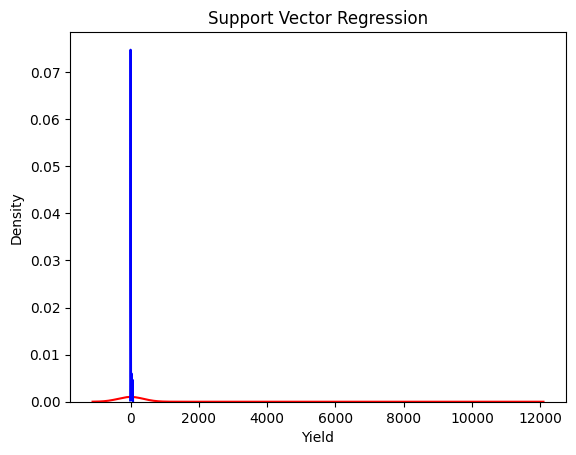

In [109]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(svr_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Support Vector Regression')

<b> Decision Tree </b>

In [110]:
# Training model
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 5)
regressor.fit(x_train,y_train)

# Predicting results
decisiontree_predict = regressor.predict(x_test)
decisiontree_predict

array([5.52777047e+03, 2.92886781e+00, 7.11196134e+00, ...,
       2.70676692e+00, 7.11196134e+00, 0.00000000e+00])

In [111]:
regressor.score(x_test,y_test)

0.9827690658051871

In [112]:
# Calculating R2 score :

from sklearn.metrics import r2_score
r2 = r2_score(y_test,decisiontree_predict)
print("R2 score : ",r2)

R2 score :  0.9827690658051871


In [113]:
# Calculating Adj. R2 score:

Adjr2_2 = 1 - (1-r)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
print("Adj. R-Squared : {}".format(Adjr2_2))

Adj. R-Squared : 0.8546434405242911


/tmp/ipython-input-697514152.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
/tmp/ipython-input-697514152.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(decisiontree_predict, hist = False, color = "b", la

Text(0.5, 1.0, 'Decision Tree Regression')

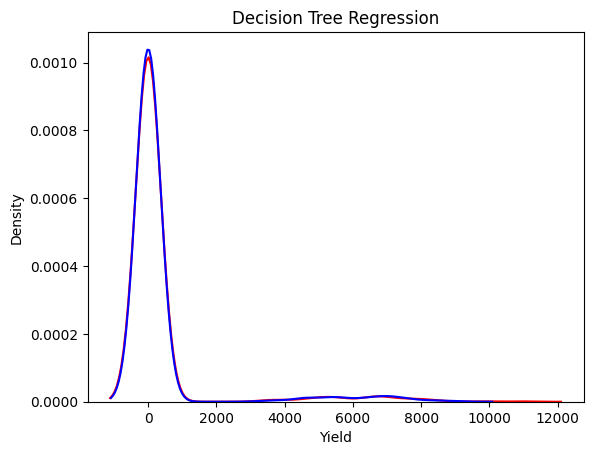

In [114]:
ax = sns.distplot(y_test, hist = False, color = "r", label = "Actual value ")
sns.distplot(decisiontree_predict, hist = False, color = "b", label = "Predicted Values", ax = ax)
plt.title('Decision Tree Regression')

<b> Cross-validation </b>

In [115]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model2, X = x_train, y=y_train, cv = 10)

In [116]:
a1 = (accuracies.mean()*100)
b1 = (accuracies.std()*100)

In [117]:

# Mean Accuracy and SD of 10 fold results

print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 99.08%
Standard Deviation : 0.33%


<b> Cross-validation </b>

In [118]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = regressor, X = x_train, y=y_train)

In [119]:
a2 = (accuracies.mean()*100)
b2 = (accuracies.std()*100)

In [120]:
print("Accuracy : {:.2f}%".format (accuracies.mean()*100))
print("Standard Deviation : {:.2f}%".format(accuracies.std()*100))

Accuracy : 98.45%
Standard Deviation : 0.48%


**Comparing models**

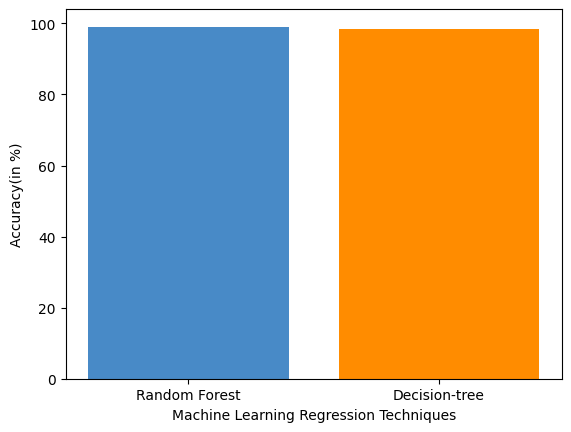

In [121]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Accuracy(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()

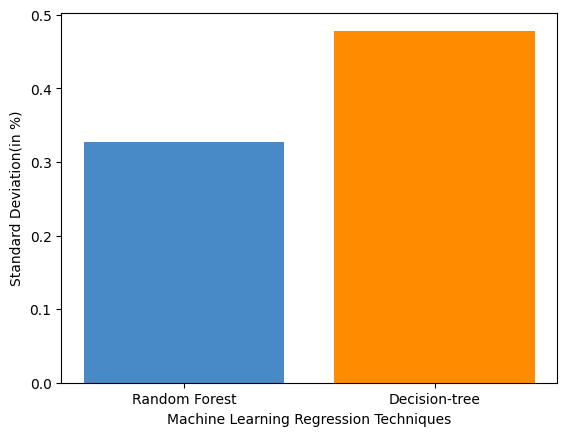

<Figure size 640x480 with 0 Axes>

In [122]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [b1, b2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

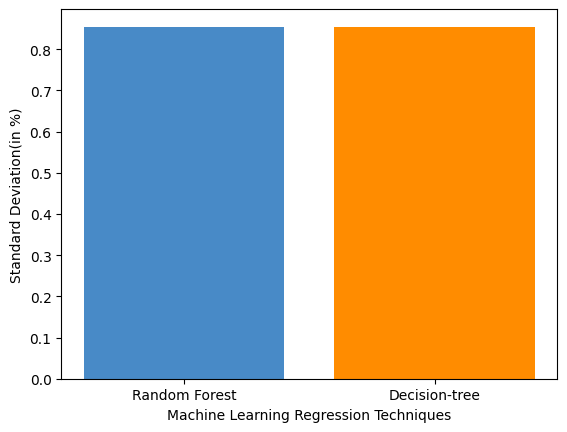

<Figure size 640x480 with 0 Axes>

In [123]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Standard Deviation(in %)')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

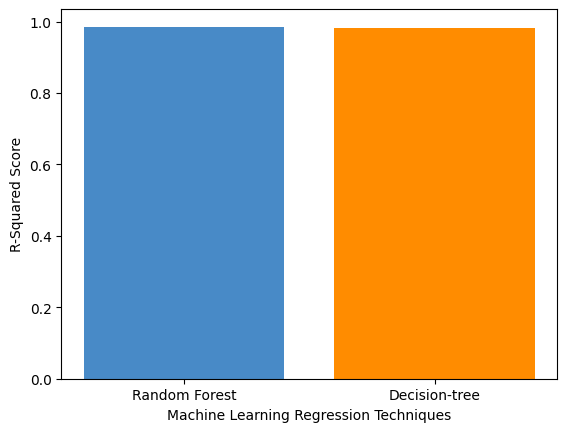

<Figure size 640x480 with 0 Axes>

In [124]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [r1, r2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

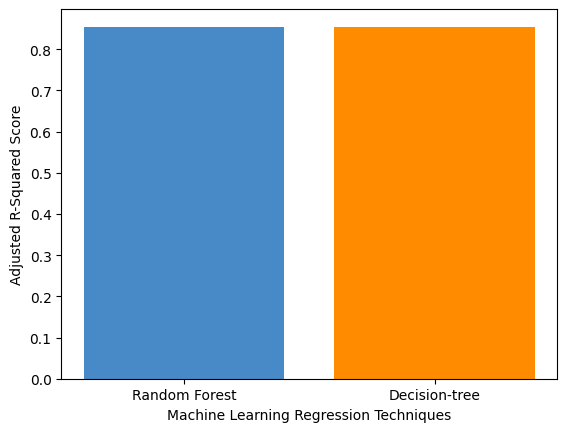

<Figure size 640x480 with 0 Axes>

In [125]:
import numpy as np
import matplotlib.pyplot as plt

# create a dataset
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [Adjr2_1, Adjr2_2]

x_pos = np.arange(len(Accuracy))

# Create bars with different colors
plt.bar(x_pos, Accuracy, color=['#488AC7','#ff8c00'])

# Create names on the x-axis
plt.xticks(x_pos, Algorithms)
plt.ylabel('Adjusted R-Squared Score')
plt.xlabel('Machine Learning Regression Techniques')

# Show graph
plt.show()
plt.savefig('SD.png')

In [126]:
from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, rf_predict)

In [127]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(rf_predict,y_test))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, rf_predict))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, rf_predict)))

Mean Absolute Error: 32.10385998357748
Mean Squared Error: 30752.33455094357
Root Mean Squared Error: 175.36343561570516


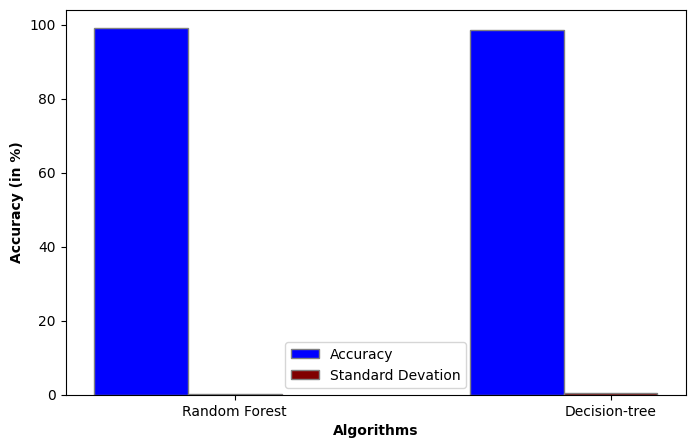

In [128]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(8, 5))

# set height of bar
Algorithms = ['Random Forest', 'Decision-tree']
Accuracy = [a1, a2]
Standard_Deviation = [b1,b2]

# Set position of bar on X axis
br1 = np.arange(len(Accuracy))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]

# Make the plot
plt.bar(br1, Accuracy, color ='blue', width = barWidth,
        edgecolor ='grey', label ='Accuracy')
plt.bar(br2, Standard_Deviation, color ='maroon', width = barWidth,
        edgecolor ='grey', label ='Standard Devation')

# Adding Xticks
plt.xlabel('Algorithms', fontweight ='bold', fontsize = 10)
plt.ylabel('Accuracy (in %)', fontweight ='bold', fontsize = 10)
plt.xticks([r + barWidth for r in range(len(Accuracy))],
        Algorithms)

plt.legend()
plt.show()

<b> Hyperparameter Tuning using GridSearchCV </b>

Random Forest Regression

In [143]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# ---- Grid Search ----
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(
    RandomForestRegressor(random_state=5),
    param_grid,
    cv=5,
    n_jobs=-1,
    verbose=3
)

grid_search.fit(x_train, y_train)

print("Best Parameters from GridSearch:", grid_search.best_params_)
print("Best Score from GridSearch:", grid_search.best_score_)




Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters from GridSearch: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score from GridSearch: 0.9896942418992907


In [144]:
# ---- Randomized Search ----
param_dist = {
    'n_estimators': randint(50, 200),
    'max_depth': randint(5, 30),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10)
}

random_search = RandomizedSearchCV(
    RandomForestRegressor(random_state=5),
    param_distributions=param_dist,
    n_iter=10,   # you can increase for better search
    cv=5,
    n_jobs=-1,
    verbose=3
)

random_search.fit(x_train, y_train)

print("Best Parameters from RandomizedSearch:", random_search.best_params_)
print("Best Score from RandomizedSearch:", random_search.best_score_)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters from RandomizedSearch: {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 70}
Best Score from RandomizedSearch: 0.9879657566269


In [ ]:
import pickle

In [ ]:
with open('model.pkl','wb') as file:
  pickle.dump(model2,file)